# Task 2 - TSF GRIP

In this task we are given a part of the "Iris" dataset, and are supposed to predict the optimum number of clusters needed and to represent that visually.

Start off by importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

Importing Data from .csv file

In [25]:
file_path = 'C:/01_Adil Mubashir/16_Internships/The Sparks Foundation/Data Analysis/Task_2/Iris.csv'
data = pd.read_csv(file_path)                           #reading local csv file and storing as dataframe
print('\n\nDataFrame before removing ID Column\n')
print(data.head())                                      #printing to check the intially loaded Dataframe

#as we can see theres an extra ID # column which is useless for us so we will drop that
data.drop(axis=1, labels="Id", inplace=True)            
print('\n\nDataFrame after removing ID Column\n')
print(data.head())




DataFrame before removing ID Column

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


DataFrame after removing ID Column

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


Finding the Optimum Number of Clusters, this can be done using the elbow method.This is an itterative method where we change the number of clusters in our KMeans clusters within a range and then we plot a line graph using the distortion we extract from the data. The number of clusters are determined where the elbow of the graph forms, hence the name "Elbow Method".

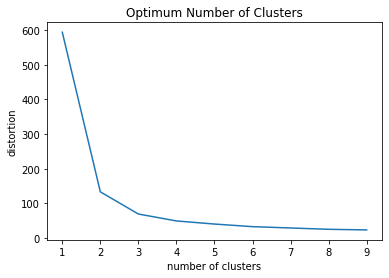

In [31]:
x = data.iloc[:, range(0,3)].values                  #seperating the features of our target variable
distortions = []                                     #creating an empty list
num_clusters = range(1,10)

for i in num_clusters:          #in this for loop we will itteratively change the clusters and append distortion in the list
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)
plt.plot(num_clusters, distortions)                  #plotting the graph
plt.title("Optimum Number of Clusters")
plt.xlabel("number of clusters")
plt.ylabel("distortion")
plt.show()

as we can see in the above graph, the number of optimum clusters are 3 in this case, which tells us that there are 3 different clusters of Iris depending on their features

now we will use the information to apply the number of clusters on our dataset

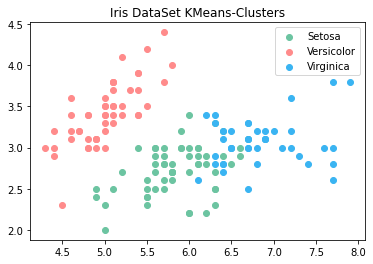

In [43]:
kmeans = KMeans(n_clusters=3, random_state=0)
y = kmeans.fit_predict(x)
plt.scatter(x[y==0 ,0], x[y==0,1], c='#6CC4A1', label='Setosa')
plt.scatter(x[y==1 ,0], x[y==1,1], c='#FF8B8B', label='Versicolor')
plt.scatter(x[y==2 ,0], x[y==2,1], c='#3AB4F2', label='Virginica')
plt.title("Iris DataSet KMeans-Clusters")
plt.legend()
plt.show()